## Import Dependencies

In [1]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name())
print(torch.cuda.memory_allocated())

True
0
NVIDIA GeForce RTX 3050 Laptop GPU
0


In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import random

## Create a graph network

In [9]:
def create_real_time_graph():
    """
    Creates a real-time graph network with 20 nodes representing locations
    and edges with weights representing distances in kilometers.

    Returns:
        G (networkx.Graph): A graph object with nodes and weighted edges.
    """
    G = nx.Graph()

    # Add nodes
    locations = {i: f"{i}" for i in range(20)}
    G.add_nodes_from(locations.keys())

    # Define edges with distances (weights)
    edges = [
        (0, 1, 5), (0, 2, 10), (1, 3, 7), (2, 3, 6),
        (2, 4, 15), (3, 5, 9), (4, 5, 4), (4, 6, 8),
        (5, 7, 3), (6, 8, 12), (7, 9, 6), (8, 9, 5),
        (8, 10, 14), (9, 11, 7), (10, 12, 11), (11, 13, 9),
        (12, 14, 13), (13, 15, 10), (14, 16, 6), (15, 17, 12),
        (16, 18, 8), (17, 19, 9), (18, 19, 5)
    ]

    # Add edges to the graph
    for edge in edges:
        G.add_edge(edge[0], edge[1], weight=edge[2])

    return G, locations

In [10]:
def plot_graph(G, locations):
    """
    Plots the given graph with enhanced visualization and sufficient spacing.

    Args:
        G (networkx.Graph): The graph object to be visualized.
        locations (dict): A dictionary mapping node IDs to location names.
    """
    # Generate positions for the nodes with increased spacing (k=2.5)
    pos = nx.spring_layout(G, seed=42, k=4)

    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, node_size=800, node_color="lightblue", edgecolors="black")

    # Draw the edges
    nx.draw_networkx_edges(G, pos, width=1.5, edge_color="gray", alpha=0.7)

    # Add labels for nodes
    nx.draw_networkx_labels(G, pos, labels=locations, font_size=10, font_color="black")

    # Add edge labels (weights)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v} km" for k, v in edge_labels.items()},
                                 font_size=8, font_color="black")

    # Add title and improve layout
    plt.title("Real-Time Road Network with 20 Nodes", fontsize=16, fontweight="bold")
    plt.axis("off")  # Turn off axis
    plt.tight_layout()
    plt.show()

In [11]:
def print_all_paths(graph, start, goal):
    """
    Prints all possible paths between the start and goal nodes in the graph.

    Args:
        graph (networkx.Graph): The graph object.
        start (int): The starting node.
        goal (int): The target node.
    """
    # Find all simple paths
    paths = list(nx.all_simple_paths(graph, source=start, target=goal))
    print(f"All possible paths from {start} to {goal}:")
    for i, path in enumerate(paths, start=1):
        print(f"Path {i}: {' -> '.join(map(str, path))}")


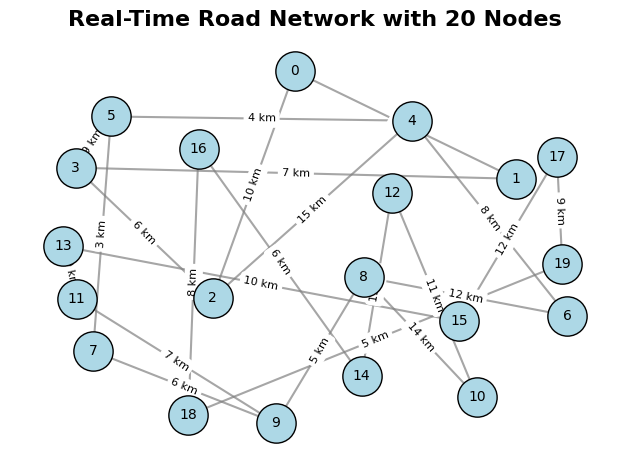

In [12]:
# Create the graph and plot it
graph, location_labels = create_real_time_graph()
plot_graph(graph, location_labels)


In [16]:
print_all_paths(graph, start=0, goal=17)

All possible paths from 0 to 17:
Path 1: 0 -> 1 -> 3 -> 2 -> 4 -> 5 -> 7 -> 9 -> 8 -> 10 -> 12 -> 14 -> 16 -> 18 -> 19 -> 17
Path 2: 0 -> 1 -> 3 -> 2 -> 4 -> 5 -> 7 -> 9 -> 11 -> 13 -> 15 -> 17
Path 3: 0 -> 1 -> 3 -> 2 -> 4 -> 6 -> 8 -> 9 -> 11 -> 13 -> 15 -> 17
Path 4: 0 -> 1 -> 3 -> 2 -> 4 -> 6 -> 8 -> 10 -> 12 -> 14 -> 16 -> 18 -> 19 -> 17
Path 5: 0 -> 1 -> 3 -> 5 -> 4 -> 6 -> 8 -> 9 -> 11 -> 13 -> 15 -> 17
Path 6: 0 -> 1 -> 3 -> 5 -> 4 -> 6 -> 8 -> 10 -> 12 -> 14 -> 16 -> 18 -> 19 -> 17
Path 7: 0 -> 1 -> 3 -> 5 -> 7 -> 9 -> 8 -> 10 -> 12 -> 14 -> 16 -> 18 -> 19 -> 17
Path 8: 0 -> 1 -> 3 -> 5 -> 7 -> 9 -> 11 -> 13 -> 15 -> 17
Path 9: 0 -> 2 -> 3 -> 5 -> 4 -> 6 -> 8 -> 9 -> 11 -> 13 -> 15 -> 17
Path 10: 0 -> 2 -> 3 -> 5 -> 4 -> 6 -> 8 -> 10 -> 12 -> 14 -> 16 -> 18 -> 19 -> 17
Path 11: 0 -> 2 -> 3 -> 5 -> 7 -> 9 -> 8 -> 10 -> 12 -> 14 -> 16 -> 18 -> 19 -> 17
Path 12: 0 -> 2 -> 3 -> 5 -> 7 -> 9 -> 11 -> 13 -> 15 -> 17
Path 13: 0 -> 2 -> 4 -> 5 -> 7 -> 9 -> 8 -> 10 -> 12 -> 14 -> 16 -> 

Edges with weights:
0 - 3: 16.46
0 - 6: 19.19
0 - 5: 18.32
1 - 4: 13.85
1 - 7: 5.28
1 - 8: 10.08
2 - 9: 1.55
3 - 9: 7.52
3 - 7: 14.56
4 - 5: 19.46
4 - 6: 17.92
5 - 9: 13.11
6 - 7: 6.61


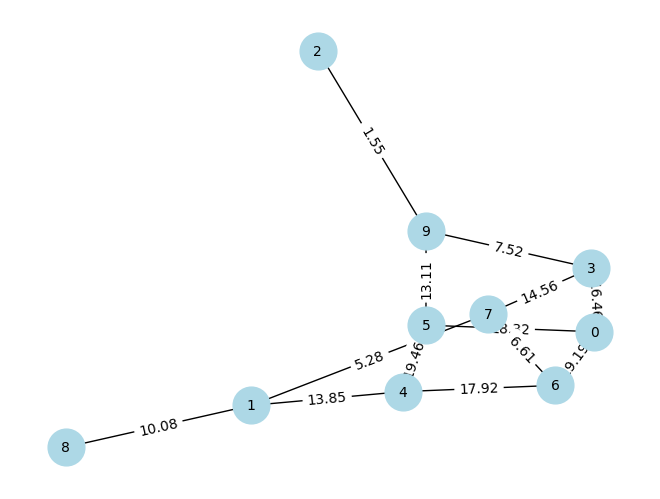

In [7]:
def create_random_graph_with_constraints(num_nodes):
    """
    Create a random graph with the constraint that each node has at most 3 connections.
    
    Args:
        num_nodes (int): The number of nodes in the graph.
    
    Returns:
        G: A NetworkX graph object.
    """
    G = nx.Graph()  # Create an empty undirected graph

    # Add nodes to the graph
    for i in range(num_nodes):
        G.add_node(i)

    # Add edges with random weights ensuring each node has at most 3 connections
    while True:
        node1 = random.randint(0, num_nodes - 1)
        node2 = random.randint(0, num_nodes - 1)

        if node1 != node2 and G.degree[node1] < 3 and G.degree[node2] < 3:
            if not G.has_edge(node1, node2):  # Ensure no duplicate edges
                weight = round(random.uniform(1, 20), 2)  # Random weight between 1 and 100
                G.add_edge(node1, node2, weight=weight)

        # Stop when all nodes have at least one connection and at most 3 connections
        if all(1 <= G.degree[node] <= 3 for node in G.nodes):
            break

    return G

# Generate a random graph with 10 nodes
num_nodes = 10
G = create_random_graph_with_constraints(num_nodes)

# Print the edges with weights
print("Edges with weights:")
for u, v, weight in G.edges(data="weight"):
    print(f"{u} - {v}: {weight}")

# Draw the graph with edge weights
pos = nx.spring_layout(G)  # Position nodes using a spring layout
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=10)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()
